
##Objective:

The main goal of the project is to segment customers into distinct clusters based on various features (e.g., purchasing behavior, demographics, engagement) using KMeans clustering. This helps businesses understand their customer base and allows for more personalized marketing and business strategies.

dataset link --> https://drive.google.com/file/d/11erjjvnII799Wx3aWaWVKZZ_7kJcW5Pa/view?usp=sharing

In [ ]:
#Importing librabries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#reading csv through pandas mlibrary
df = pd.read_csv('/content/new.csv')
df.head()#first five rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail()#last 5 rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.shape #shape of database(datapoints , features)

(2240, 29)

In [ ]:
#information about every column . non_null count and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#null values
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
#dropping na values
df.dropna(inplace=True)

In [ ]:
#shape after dropping na maissing values
df.shape

(2216, 29)

In [ ]:
#duplicate values present
df.duplicated().sum()

0

no duplicatte values in dataset


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [ ]:
#Unique Values in every column

df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [ ]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')   #day of enroll
df["month"] = parts[1].astype('int')  #month of enroll
df["year"] = parts[2].astype('int')  #year of enroll

In [ ]:
#changing date of enrollement in campain from object too date datatype
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,day,month,year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,8,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,21,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,19,1,2014


In [ ]:
last_enrolled_date = df['Dt_Customer'].max()


# days since enrollment in campain
df['days_since_join'] = (last_enrolled_date - df['Dt_Customer']).dt.days


#age of the customer
df["Age"] = last_enrolled_date.year-df["Year_Birth"]

#Total amount spent
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
#



#number of children
df["Children"]=df["Kidhome"]+df["Teenhome"]



#alone or Together
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


#total number of members in Family
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,day,month,year,days_since_join,Age,Spent,Children,Living_With,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,4,9,2012,663,57,1617,0,Alone,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,8,3,2014,113,60,27,2,Alone,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,21,8,2013,312,49,776,0,Partner,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,10,2,2014,139,30,53,1,Partner,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,19,1,2014,161,33,422,1,Partner,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,13,6,2013,381,47,1341,1,Partner,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,10,6,2014,19,68,444,3,Partner,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,25,1,2014,155,33,1241,0,Alone,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,24,1,2014,156,58,843,1,Partner,3


In [ ]:
To_Plot = [ "Income", "days_since_join", 'Recency', "Age", "Spent"]

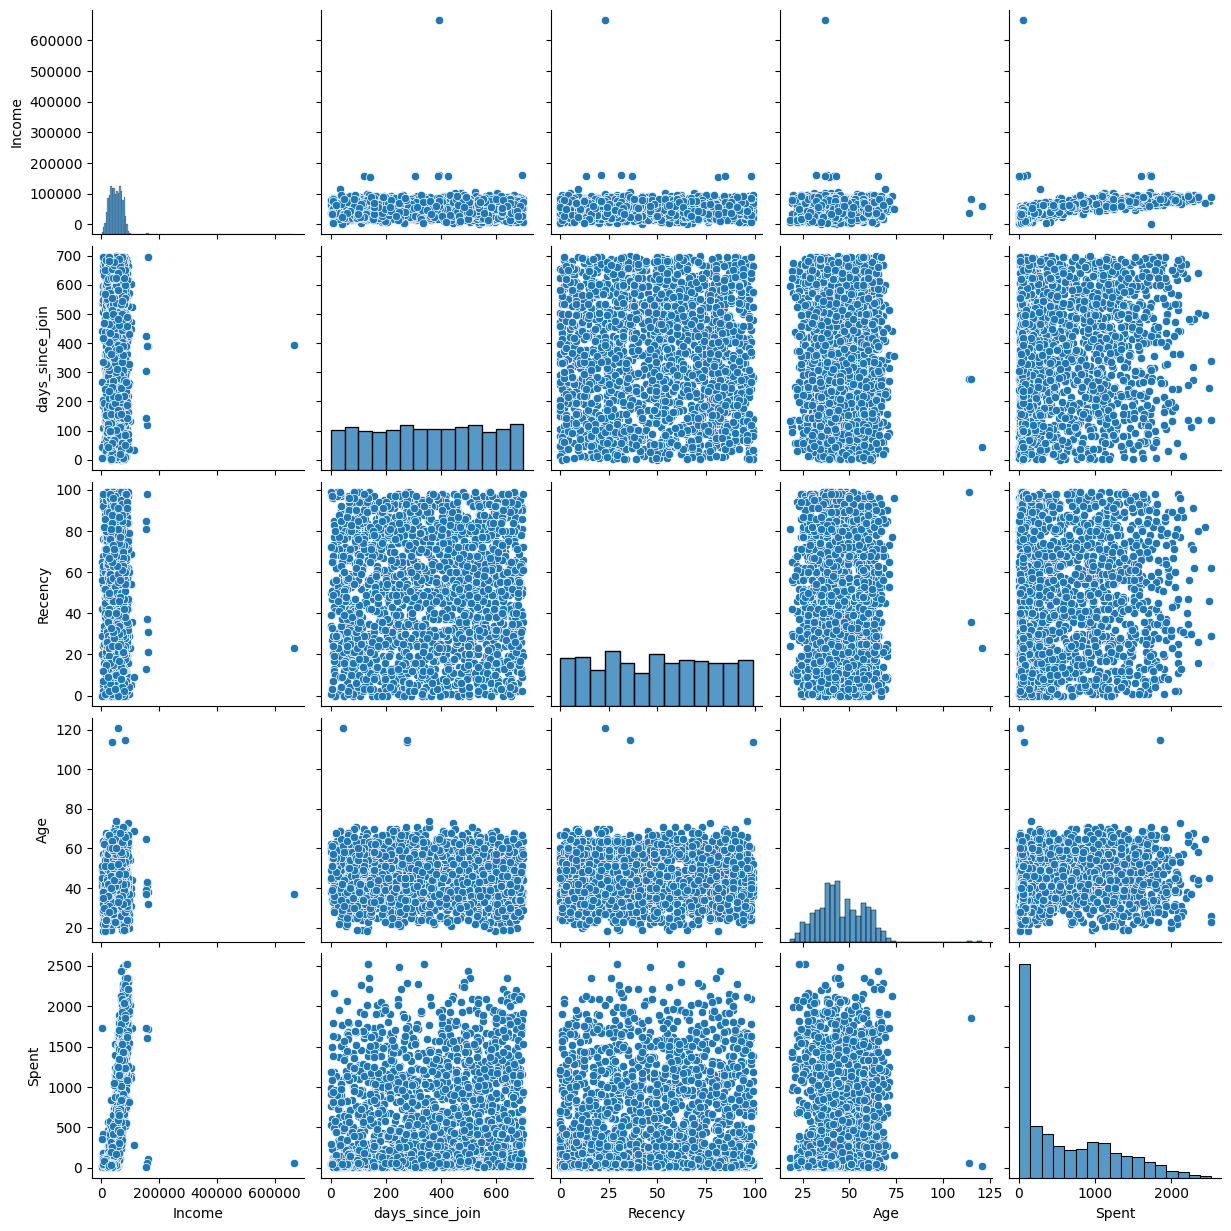

In [ ]:
#plottinga pairplot
sns.pairplot(df[To_Plot],palette= (["#682F2F","#F3AB60"]))


In [ ]:
#here we can clearly see some outliers hence lets remove them


#Dropping the outliers by setting a cap on Age and income.
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


##DATA Description

ID: Unique identifier for each record (int64).

Year_Birth: Year of birth (int64).

Education: Level of education (object).

Marital_Status: Marital status (object).

Income: Yearly income (float64) with 24 missing values.

Kidhome: Number of children in the household (int64).

Teenhome: Number of teenagers in the household (int64).

Dt_Customer: Date of enrollment in the program (object).

Recency: Number of days since the last purchase (int64).

MntWines: Amount spent on wines in the last 2 years (int64).

MntFruits: Amount spent on fruits in the last 2 years (int64).

MntMeatProducts: Amount spent on meat products in the last 2 years (int64).

MntFishProducts: Amount spent on fish products in the last 2 years (int64).

MntSweetProducts: Amount spent on sweet products in the last 2 years
(int64).

MntGoldProds: Amount spent on gold products in the last 2 years (int64).

NumDealsPurchases: Number of purchases with discounts (int64).

NumWebPurchases: Number of purchases made through the web (int64).

NumCatalogPurchases: Number of purchases made using catalogs (int64).

NumStorePurchases: Number of purchases made directly in stores (int64).

NumWebVisitsMonth: Number of visits to the company's website in the
last month (int64).

AcceptedCmp3: 1 if the customer accepted the third campaign (int64).

AcceptedCmp4: 1 if the customer accepted the fourth campaign (int64).

AcceptedCmp5: 1 if the customer accepted the fifth campaign (int64).

AcceptedCmp1: 1 if the customer accepted the first campaign (int64).

AcceptedCmp2: 1 if the customer accepted the second campaign (int64).

Complain: 1 if the customer has complained (int64).

Z_CostContact: Cost of contact to the customer, constant at 3 (int64).

Z_Revenue: Revenue generated from the customer, constant at 11 (int64).

Response: 1 if the customer responded positively to the last campaign (int64).

In [ ]:
#not usful Columns after processing delete them
df.drop(['Z_CostContact', 'Z_Revenue', 'Year_Birth'],axis=1,inplace=True)

#since Z_costcontact aNd Z_revenue has same values everywhere hence not useful for diffferenciation

In [ ]:
#checking unique value counts in Education column

df['Education'].value_counts()

,count
Education,
Graduation,1115
PhD,480
Master,365
2n Cycle,198
Basic,54


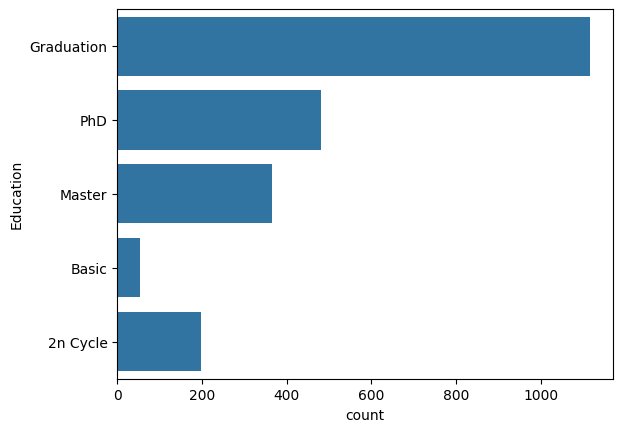

In [ ]:
#plotting unique value counts in Education column

df['Education'].value_counts()
sns.countplot(df['Education'])
plt.show()

In [ ]:
#checking unique value counts in Marital_Status column

df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,571
Single,470
Divorced,231
Widow,76
Alone,3
Absurd,2
YOLO,2


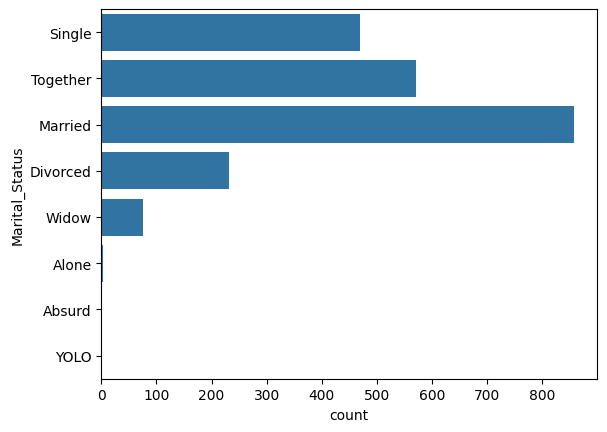

In [ ]:
#plotting unique value counts in Marital_Status column

sns.countplot(df['Marital_Status'])
plt.show()

visualizing data wrt response to the last campaign

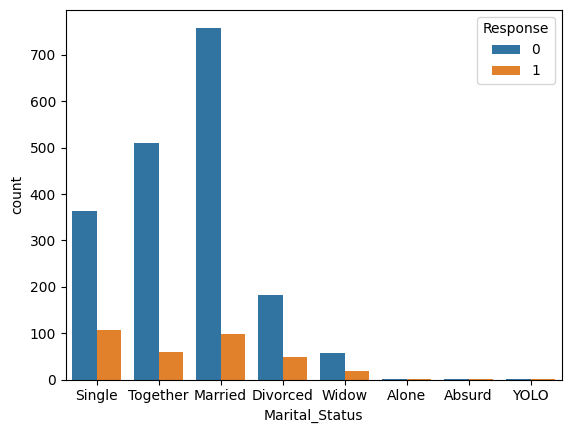

In [ ]:
#count of marital status based on response

sns.countplot(data=df,x='Marital_Status',hue='Response')
plt.show()


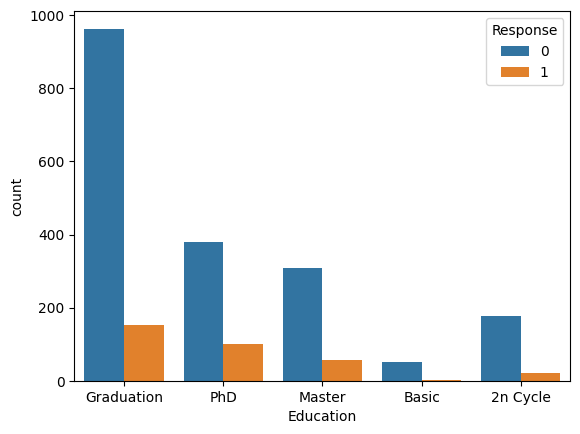

In [ ]:
#count of Education based on response

sns.countplot(data=df,x='Education',hue='Response')
plt.show()

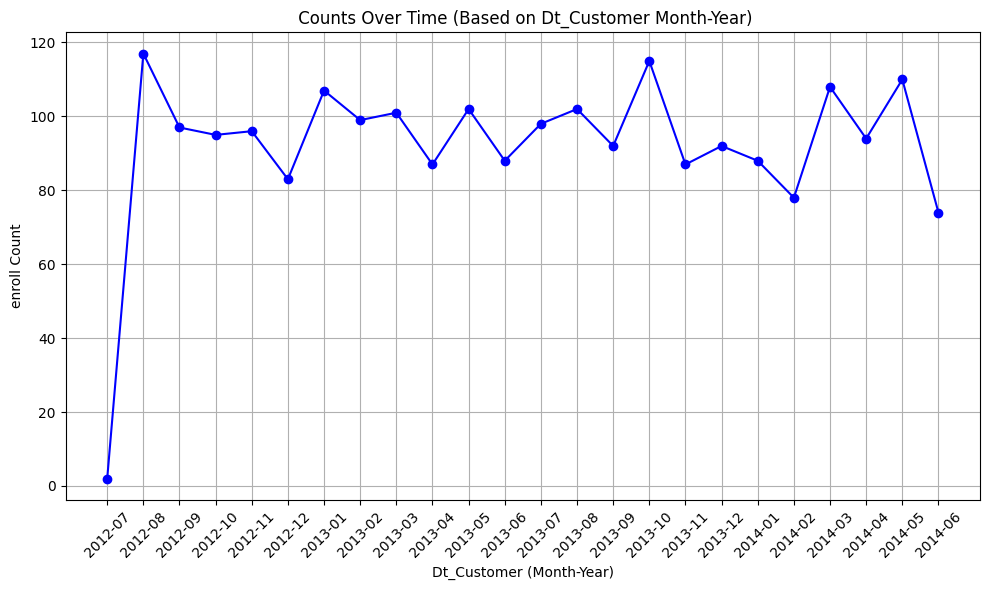

In [ ]:
# Convert 'Dt_Customer' and 'enroll_date' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Dt_Customer_MonthYear_order'] = df['Dt_Customer'].dt.to_period('M').astype(str)


df['Dt_Customer_MonthYear'] = df['Dt_Customer'].dt.strftime('%m-%Y')

# Count the number of enrolls made for each month-year
enroll_counts = df.groupby('Dt_Customer_MonthYear_order').size()



# Plotting the line plot
plt.figure(figsize=(10,6))
plt.plot(enroll_counts.index, enroll_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Dt_Customer (Month-Year)')
plt.ylabel('enroll Count')
plt.title(' Counts Over Time (Based on Dt_Customer Month-Year)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()






enroll_counts = df.groupby('Dt_Customer').size()


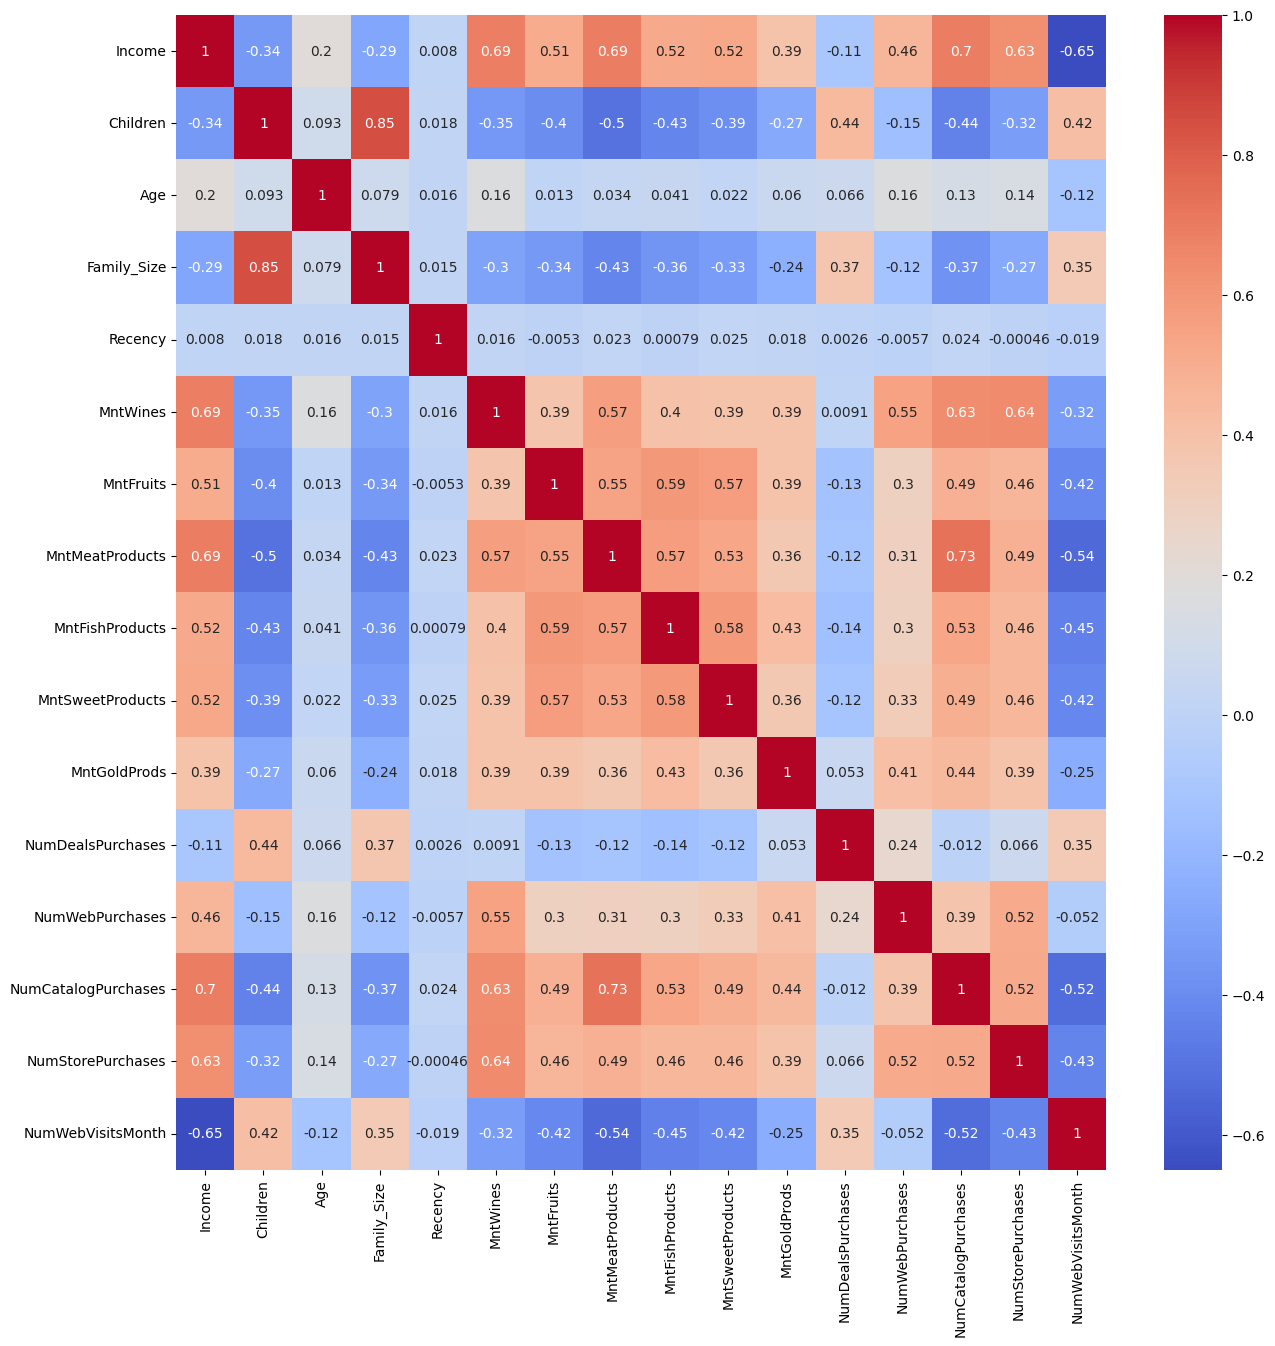

In [ ]:
#Heatmap to see correlation between different columns


plt.figure(figsize=(15, 15))
selected_columns=['Income', 'Children','Age','Family_Size', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']
sns.heatmap(df[selected_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

Using label Encoding for the categorical columns , To convert these categorical column into a numerical column so that they can be fitted by machine learning models which only take numerical data.

In [ ]:
#using label encoder on Education and marital_status column  for label encoding and changing categorical columns to numerical
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [ ]:
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,month,year,days_since_join,Age,Spent,Children,Living_With,Family_Size,Dt_Customer_MonthYear_order,Dt_Customer_MonthYear
0,5524,2,4,58138.0,0,0,2012-09-04,58,635,88,...,9,2012,663,57,1617,0,Alone,1,2012-09,09-2012
1,2174,2,4,46344.0,1,1,2014-03-08,38,11,1,...,3,2014,113,60,27,2,Alone,3,2014-03,03-2014
2,4141,2,5,71613.0,0,0,2013-08-21,26,426,49,...,8,2013,312,49,776,0,Partner,2,2013-08,08-2013
3,6182,2,5,26646.0,1,0,2014-02-10,26,11,4,...,2,2014,139,30,53,1,Partner,3,2014-02,02-2014
4,5324,4,3,58293.0,1,0,2014-01-19,94,173,43,...,1,2014,161,33,422,1,Partner,3,2014-01,01-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,3,61223.0,0,1,2013-06-13,46,709,43,...,6,2013,381,47,1341,1,Partner,3,2013-06,06-2013
2236,4001,4,5,64014.0,2,1,2014-06-10,56,406,0,...,6,2014,19,68,444,3,Partner,5,2014-06,06-2014
2237,7270,2,2,56981.0,0,0,2014-01-25,91,908,48,...,1,2014,155,33,1241,0,Alone,1,2014-01,01-2014
2238,8235,3,5,69245.0,0,1,2014-01-24,8,428,30,...,1,2014,156,58,843,1,Partner,3,2014-01,01-2014


In [ ]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'day', 'month', 'year', 'days_since_join',
       'Age', 'Spent', 'Children', 'Living_With', 'Family_Size',
       'Dt_Customer_MonthYear_order', 'Dt_Customer_MonthYear'],
      dtype='object')

In [ ]:
ds = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           2212 non-null   int64         
 1   Education                    2212 non-null   int64         
 2   Marital_Status               2212 non-null   int64         
 3   Income                       2212 non-null   float64       
 4   Kidhome                      2212 non-null   int64         
 5   Teenhome                     2212 non-null   int64         
 6   Dt_Customer                  2212 non-null   datetime64[ns]
 7   Recency                      2212 non-null   int64         
 8   MntWines                     2212 non-null   int64         
 9   MntFruits                    2212 non-null   int64         
 10  MntMeatProducts              2212 non-null   int64         
 11  MntFishProducts              2212 non-null   int

In [ ]:
# Dropping unrelated columns

cols_del = ['Dt_Customer_MonthYear_order' ,'Dt_Customer','Living_With','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response' , 'Dt_Customer_MonthYear']
ds = ds.drop(cols_del, axis=1)

In [ ]:
#scaling the data using standard scaler

scaler = StandardScaler()
scaled_ds = scaler.fit_transform(ds)
scaled_ds

array([[-0.01883736, -0.35254334,  0.25476002, ...,  1.67624537,
        -1.26459792, -1.75835869],
       [-1.05062581, -0.35254334,  0.25476002, ..., -0.96329696,
         1.4045725 ,  0.44907004],
       [-0.44479659, -0.35254334,  1.18314414, ...,  0.28011009,
        -1.26459792, -0.65464433],
       ...,
       [ 0.51892462, -0.35254334, -1.60200822, ...,  1.05205171,
        -1.26459792, -1.75835869],
       [ 0.8161413 ,  0.53868622,  1.18314414, ...,  0.39133608,
         0.06998729,  0.44907004],
       [ 1.17649726,  1.42991579, -0.6736241 , ..., -0.72258398,
         1.4045725 ,  1.55278441]])

In [ ]:
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")
scaled_ds.drop(columns={'ID','day','month','year'} , inplace=True)

All features are now scaled


In [ ]:
scaled_ds

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,days_since_join,Age,Spent,Children,Family_Size
0,-0.352543,0.254760,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,...,0.351030,1.426865,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.264598,-1.758359
1,-0.352543,0.254760,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,...,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,1.404572,0.449070
2,-0.352543,1.183144,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,...,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,-1.264598,-0.654644
3,-0.352543,1.183144,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,...,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.069987,0.449070
4,1.429916,-0.673624,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,...,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.069987,0.449070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.352543,-0.673624,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,...,-0.168701,1.791619,0.111982,-0.555814,-0.132545,0.134778,0.163575,1.218061,0.069987,0.449070
2208,1.429916,1.183144,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,...,2.429954,1.426865,-0.229679,-0.248141,0.692181,-1.653326,1.958607,-0.271040,2.739158,2.656499
2209,-0.352543,-1.602008,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,...,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.981552,-1.033114,1.052052,-1.264598,-1.758359
2210,0.538686,1.183144,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,...,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.976612,1.103830,0.391336,0.069987,0.449070


In [ ]:
#Initiating PCA to view dimentions aka features to 5
pca = PCA(n_components=5)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3","col4","col5"]))
PCA_ds.describe().T



pca_result = pca.fit_transform(scaled_ds)
pca_result

array([[ 4.67176028, -0.12797943,  2.12962323,  0.54740431,  0.89164788],
       [-2.86329605,  0.27711483, -1.73097848, -1.03298018,  0.41539181],
       [ 2.2792392 , -0.71338626, -0.15829203,  0.482605  ,  0.99588101],
       ...,
       [ 2.21853827, -1.64818207, -0.02603169,  0.97320304, -1.26819015],
       [ 1.79537069,  1.37187392, -1.77870726, -0.23098358,  0.5922783 ],
       [-2.54918223,  2.03849283, -0.46952291,  0.44789335, -0.5741942 ]])

In [ ]:
#explained variance upto 5 features

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.35573068, 0.12123675, 0.07116751, 0.05780807, 0.04721647])

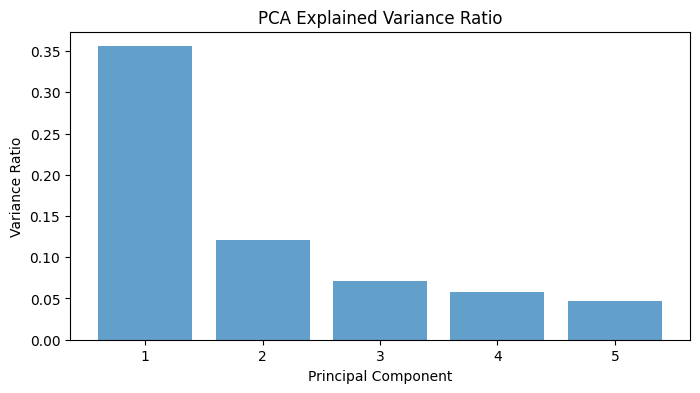

In [ ]:
#visualizing explained variable wrt feature

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

Taking only first three columns of transformed through pca

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

In [ ]:
#dropping less explained variance features
PCA_ds = PCA_ds.drop(columns=['col4','col5'])



In [ ]:
inertia = []  # List to store the inertia for each k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(PCA_ds)
    inertia.append(kmeans.inertia_)

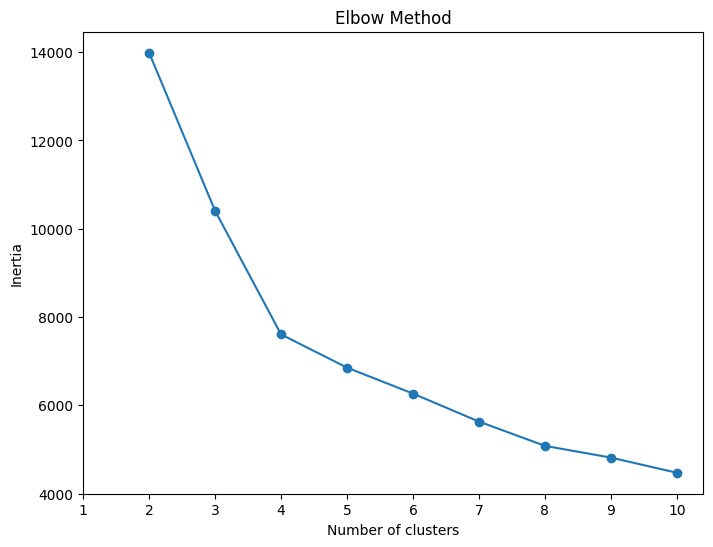

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 11))
plt.show()

ELBOW is observed at k=4

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(PCA_ds)
    centers = km.cluster_centers_

    score = silhouette_score(PCA_ds, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(PCA_ds)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.4543476494631918


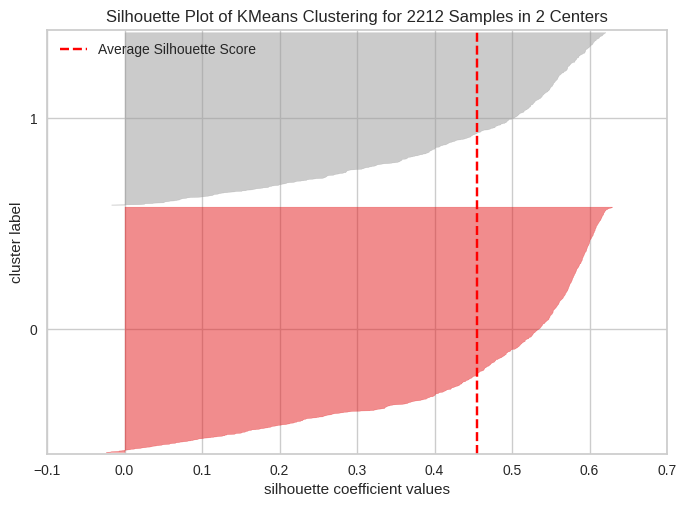

For n_clusters = 3, silhouette score is 0.3619023363890914


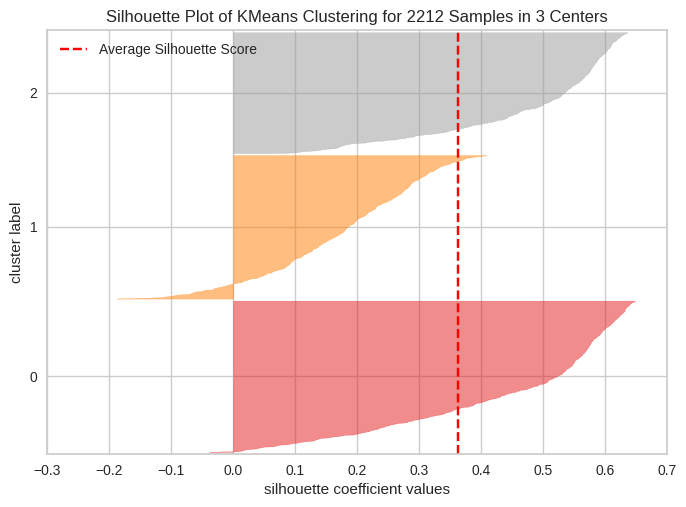

For n_clusters = 4, silhouette score is 0.39879300195750694


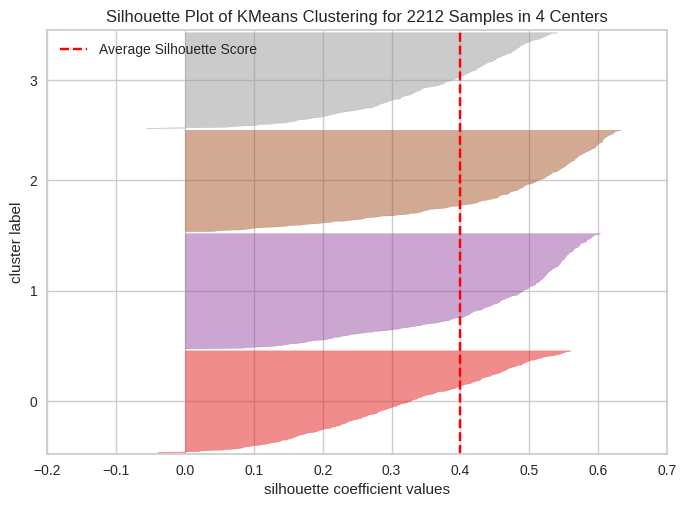

For n_clusters = 5, silhouette score is 0.3663235120672469


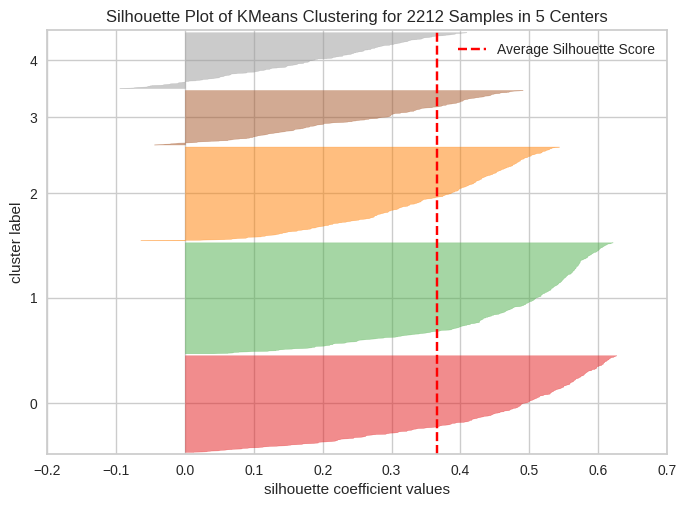

For n_clusters = 6, silhouette score is 0.3578955151312745


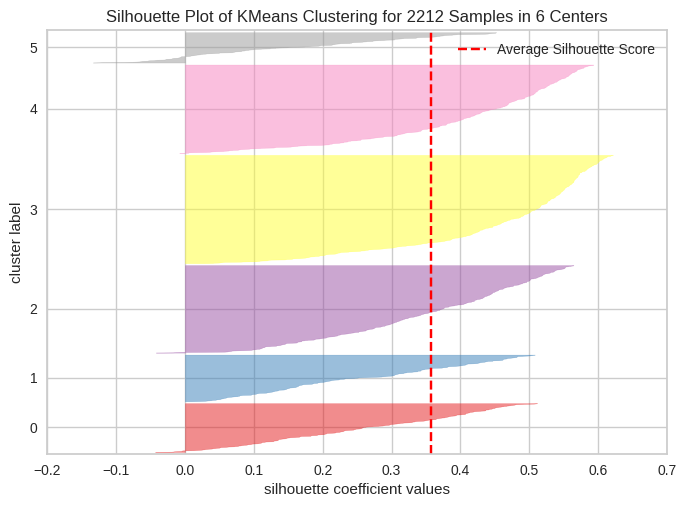

For n_clusters = 7, silhouette score is 0.3025423658424586


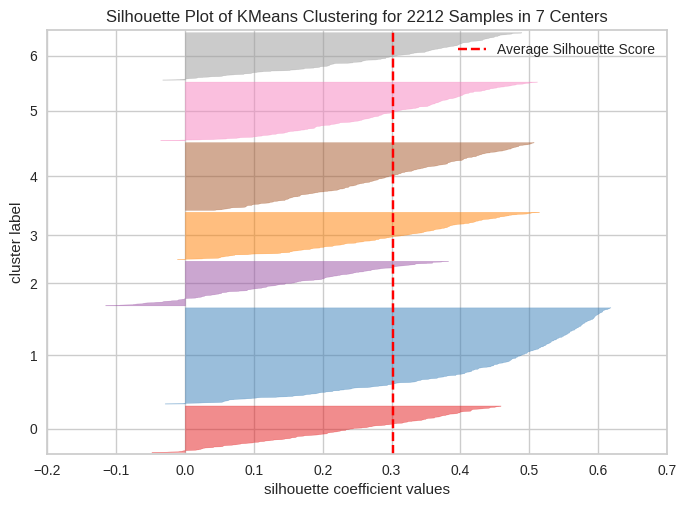

For n_clusters = 8, silhouette score is 0.272882178792104


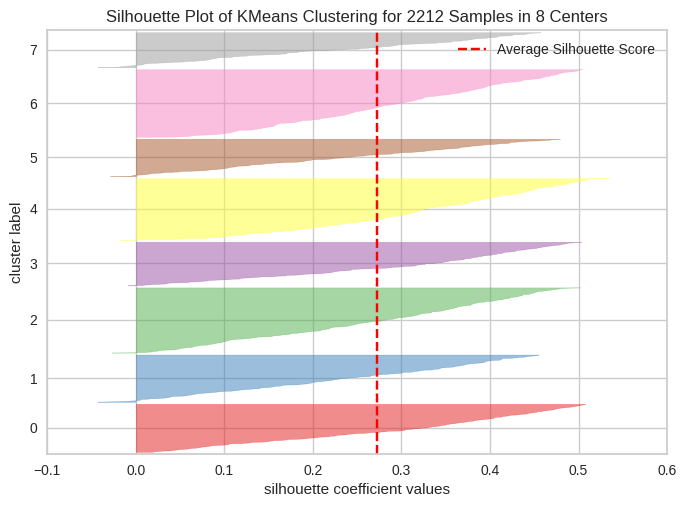

For n_clusters = 9, silhouette score is 0.2724332739441832


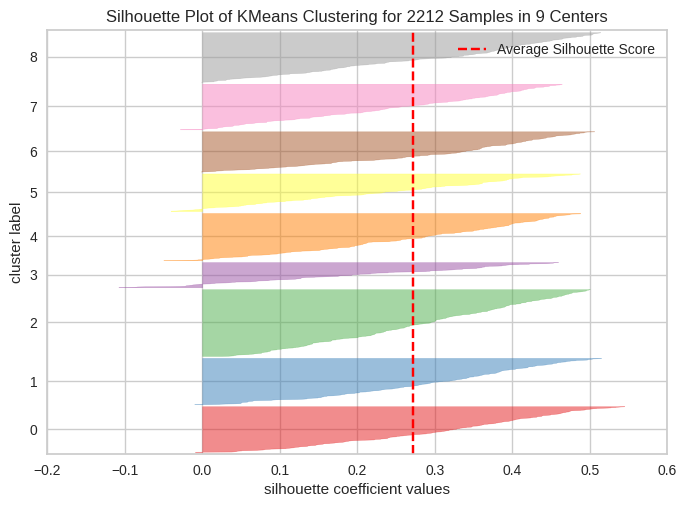

In [ ]:
#checking for silhouette score
silhouette_analysis(10)

In [ ]:
# Apply k-means with the chosen number of clusters (assuming k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(PCA_ds)

# Add cluster labels to the dataframe
PCA_ds['Cluster'] = cluster_labels


df['Cluster'] = cluster_labels
# Analyze the clusters
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,year,days_since_join,Age,Spent,Children,Living_With,Family_Size,Dt_Customer_MonthYear_order,Dt_Customer_MonthYear,Cluster
0,5524,2,4,58138.0,0,0,2012-09-04,58,635,88,...,2012,663,57,1617,0,Alone,1,2012-09,09-2012,0
1,2174,2,4,46344.0,1,1,2014-03-08,38,11,1,...,2014,113,60,27,2,Alone,3,2014-03,03-2014,1
2,4141,2,5,71613.0,0,0,2013-08-21,26,426,49,...,2013,312,49,776,0,Partner,2,2013-08,08-2013,0
3,6182,2,5,26646.0,1,0,2014-02-10,26,11,4,...,2014,139,30,53,1,Partner,3,2014-02,02-2014,3
4,5324,4,3,58293.0,1,0,2014-01-19,94,173,43,...,2014,161,33,422,1,Partner,3,2014-01,01-2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,3,61223.0,0,1,2013-06-13,46,709,43,...,2013,381,47,1341,1,Partner,3,2013-06,06-2013,2
2236,4001,4,5,64014.0,2,1,2014-06-10,56,406,0,...,2014,19,68,444,3,Partner,5,2014-06,06-2014,1
2237,7270,2,2,56981.0,0,0,2014-01-25,91,908,48,...,2014,155,33,1241,0,Alone,1,2014-01,01-2014,0
2238,8235,3,5,69245.0,0,1,2014-01-24,8,428,30,...,2014,156,58,843,1,Partner,3,2014-01,01-2014,2


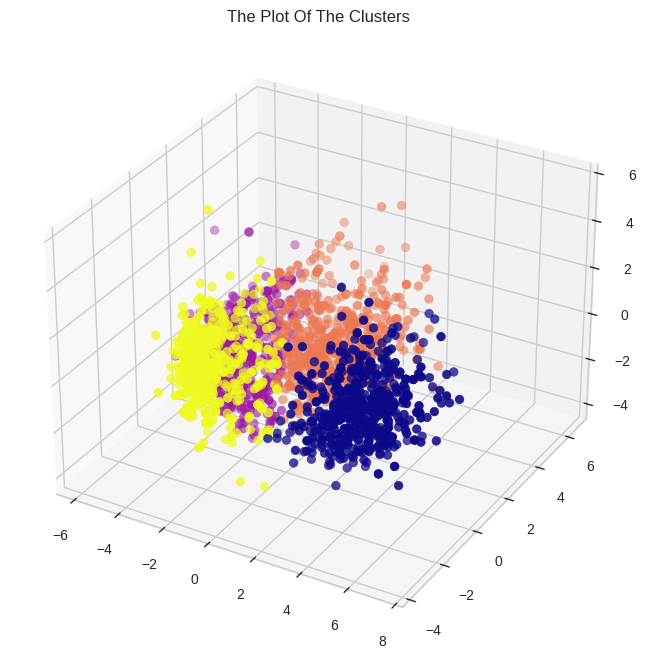

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Cluster"],cmap='plasma', marker='o',)
ax.set_title("The Plot Of The Clusters")
plt.show()

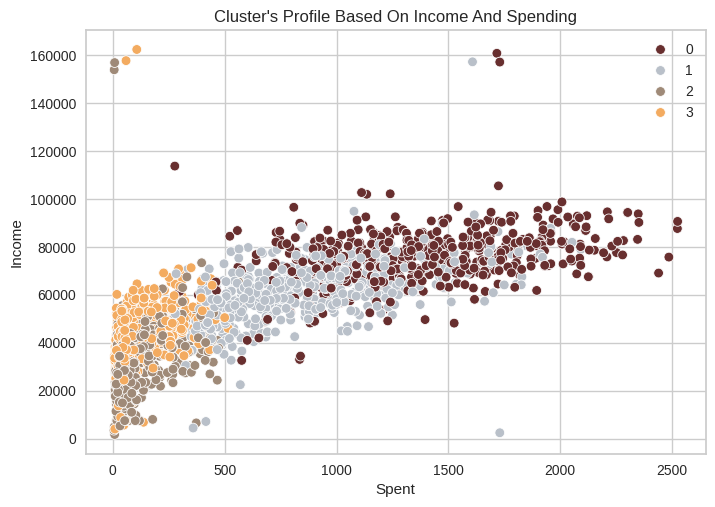

In [ ]:
#visualizing clusters wrt feature --> Spent and Income

pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

###All customers have been assigned into four different clusters

Conclusion:

The customer segmentation project using KMeans clustering provided valuable insights into the distinct groups within the customer base. By identifying these segments, the business can tailor its strategies for each group, enhancing marketing effectiveness, customer retention, and overall customer satisfaction.

Business Insights & Recommendations:

Targeted Marketing: Personalized campaigns for each customer segment based on their preferences and behaviors.

Customer Retention: Identifying "at-risk" customers and implementing strategies to improve engagement and loyalty.

Product Recommendations: Recommending products or services tailored to each customer segment's interests.

Resource Allocation: Prioritizing high-value customers for better services or loyalty programs.

Overall, the project demonstrates the importance of segmentation in understanding customer needs and behaviors. By leveraging KMeans clustering, the company now has a roadmap for more personalized, targeted actions that can lead to improved business performance and customer loyalty. Regular updates to the model, alongside continuous monitoring of the evolving customer base, will ensure that the strategies remain relevant and effective in the future.